# Regresión Lineal

A grandes rasgos la regresion lineal es un algoritmo que hace una estimación o prediccion de algun valor mediante registros pasados, por ejemplo: el clima.

La regresión lineal puede usar el método del gradiente descendente que ayuda a minimizar el error asi como el método de los mínimos cuadrados.

La fórmula para la regresión lineal con una sola variable x es:

y=wx+b


Algoritmo obtenido de:
Data Science Algorithms in a Week 

Dávid Natingga

BIRMINGHAM - MUMBAI


# Ejercicio

Intentaremos predecir el peso de varias personas mediante la talla y peso de otras

In [86]:
import math
import sys
sys.path.append("./common")
import common

In [87]:
# Se calcula el gradiente para el parametro que se debe actualizar
def linear_gradient(data, old_parameter):
    gradient = [0.0, 0.0]
    for (x, y) in data:
        term = float(y) - old_parameter[0] - old_parameter[1] * float(x)
        gradient[0] += term
        gradient[1] += term * float(x)
    return gradient

In [88]:
#Esta funcion aplica el método del gradiente descendente para aprender el modelo lineal
def learn_linear_parameter(data, learning_rate,
                           acceptable_error, LIMIT):
    parameter = [1.0, 1.0]
    old_parameter = [1.0, 1.0]
    for i in range(0, LIMIT):
        gradient = linear_gradient(data, old_parameter)
        # Update the parameter with the Least Mean Squares rule.
        parameter[0] = old_parameter[0] + learning_rate * gradient[0]
        parameter[1] = old_parameter[1] + learning_rate * gradient[1]
        # Calculate the error between the two parameters to compare with
        # the permissible error in order to determine if the calculation
        # is suffiently accurate.
        if abs(parameter[0] - old_parameter[0]) <= acceptable_error and abs(parameter[1] - old_parameter[1]) <= acceptable_error:
            return parameter
        old_parameter[0] = parameter[0]
        old_parameter[1] = parameter[1]
    return parameter


In [89]:
# Calcula y basado en el modelo de regresion lienal
def predict_unknown(data, linear_parameter):
    for (x, y) in data:
        print(x, linear_parameter[0] + linear_parameter[1] * float(x))


In [90]:
path='height_weight.csv'
# El numero maximo de iteraciones para el aloritmo
LIMIT = 100
# Parametros elegidos pra el problema dado
learning_rate = 0.0000001
acceptable_error = 0.001
(heading, complete_data, incomplete_data,
 enquired_column) = common.csv_file_to_ordered_data(path)
print(heading)
print('Datos antecesores(completos)')
print(complete_data)
print('Datos incompletos(a predecir)')
print(incomplete_data)

['height', 'weight']
Datos antecesores(completos)
[['180', '75'], ['174', '71'], ['184', '83'], ['168', '63'], ['178', '70']]
Datos incompletos(a predecir)
[['172', '?'], ['184', '?'], ['168', '?']]


In [91]:
linear_parameter = learn_linear_parameter(
    complete_data, learning_rate, acceptable_error, LIMIT)
print("Modelo lineal:\n(p0,p1)=" + str(linear_parameter) + "\n")

print("Predicciones basadas en el modelo lineal")
predict_unknown(incomplete_data, linear_parameter)

Modelo lineal:
(p0,p1)=[0.9973244467951039, 0.5275948917027403]

Predicciones basadas en el modelo lineal
172 91.74364581966644
184 98.07478452009933
168 89.63326625285548


Text(0, 0.5, 'peso')

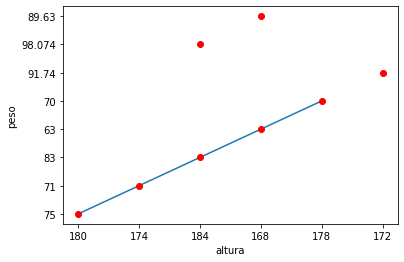

In [98]:
x=[]
y=[]
incomplete=[]
for i in incomplete_data:
    incomplete.append(i[0])
for i in complete_data:
    x.append(i[0])
    y.append(i[1])
plt.plot(x,y)
plt.plot(incomplete,['91.74','98.074','89.63'],"ro")
plt.plot(x,y,'ro')
plt.xlabel('altura')
plt.ylabel('peso')

# Codigo en R
hw = data.frame(
  height = c(180,174,184,168,178), weight= c(75,71,83,63,70)
)
model =lm(weight ~ height, data= hw)

print(model)

with(hw,plot(height,weight,pch=3,xlab='altura',ylab='peso'))

print("Altura 172")

print('Peso~=')

print(1.132*172-127.688)

print("Altura 184")

print('Peso~=')

print(1.132*184-127.688)

print("Altura 168")

print('Peso~=')

print(1.132*168-127.688)

altura=c(172,184,168)

peso=c(67.016,80.6,62.48)

points(altura,peso, pch=19,col="red")

# Resultados en consola de R

Coefficients:
(Intercept)       height  
   -127.688        1.132  

[1] "Altura 172"

[1] "Peso~="

[1] 67.016

[1] "Altura 184"

[1] "Peso~="

[1] 80.6

[1] "Altura 168"

[1] "Peso~="

[1] 62.488

Los puntos rojos representan las aproximaciones calculadas y las cruces los datos del entrenamiento
![Gráfica](https://docs.google.com/uc?export=download&id=1wllI9IbmIEqUzA1ALAr0ea1E0utz2ZWM)

# Conclusión

En r la función lm nos genera mejores aproximaciones que el algoritmo que realizamos en python; en otras palabras nos conviene trabajar con R